In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv("judges.csv", parse_dates=['doa', 'dor'])
df.sort_values("doa", inplace=True)
df.head()

,cj,doa,dor,gender,name
186,True,1950-01-26,1951-06-11,M,Hon’ble Mr. Justice Harilal Jekisundas Kania
187,True,1950-01-26,1954-03-01,M,Hon’ble Mr. Justice M. Patanjali Sastri
190,True,1950-01-26,1959-09-30,M,Hon’ble Mr. Justice Sudhi Ranjan Das
28,False,1950-01-26,1951-09-18,M,Hon’ble Mr. Justice Sir Saiyid Fazl Ali
189,True,1950-01-26,1956-01-31,M,Hon’ble Mr. Justice Bijan Kumar Mukherjea


In [3]:
df['tenure_days'] = (df['dor'] - df['doa']).apply(lambda x: x.days) + 1
year = df.doa.apply(lambda x: x.year)
df['decade'] = (year // 10) * 10

In [4]:
males = df[df.gender == "M"]
females = df[df.gender == "F"]

In [18]:
males.tenure_days.mean() / 365

5.501136433441857

In [6]:
females.tenure_days.mean()

1645.0

In [7]:
men_min = males.groupby('decade').agg(np.min)
men_max = males.groupby('decade').agg(np.max)
men_mean = males.groupby('decade').agg(np.mean)

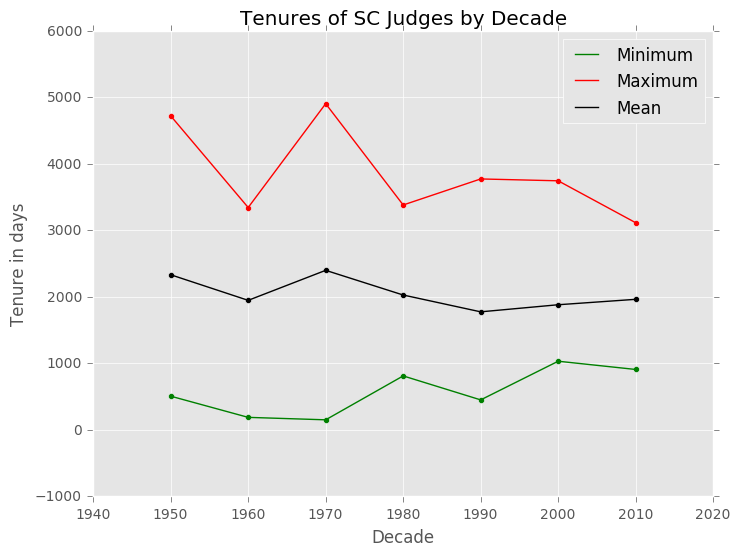

In [8]:
fig = plt.figure(figsize=(8, 6))
fig.add_subplot(111)
plt.plot(men_min.index, men_min['tenure_days'].values, "g", label="Minimum")
plt.scatter(men_min.index, men_min['tenure_days'].values, c="g", marker="o")
plt.plot(men_max.index, men_max['tenure_days'].values, "r", label="Maximum")
plt.scatter(men_max.index, men_max['tenure_days'].values, c="r", marker="o")
plt.plot(men_mean.index, men_mean['tenure_days'].values, "k", label="Mean")
plt.scatter(men_mean.index, men_mean['tenure_days'].values, c="k", marker="o")
#plt.scatter(females['decade'].values, females['tenure_days'].values, marker="$\u2640$", s=200, label="Female Judges")
plt.xlabel("Decade")
plt.ylabel("Tenure in days")
plt.title("Tenures of SC Judges by Decade")
plt.legend(loc="best")

In [9]:
males.tenure_days.mean() / 365

5.501136433441857

In [10]:
males.tenure_days.median() / 365

5.147945205479452

In [11]:
df['year'] = df['doa'].apply(lambda x: x.year)

In [12]:
males = df[df.gender == "M"]

In [13]:
post_89 = males[males.year >= 1989]

In [19]:
post_89.tenure_days.mean() / 365

5.200250967269685

In [15]:
post_89.tenure_days.median() / 365

4.964383561643835

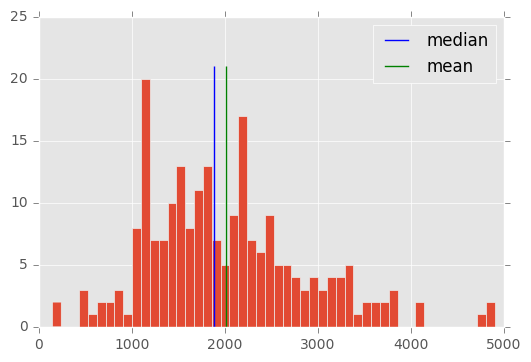

In [16]:
ax = males.tenure_days.hist(bins=50)
ax.vlines(males.tenure_days.median(), 0, 21., label="median", colors="b")
ax.vlines(males.tenure_days.mean(), 0, 21., label="mean", colors="g")
ax.legend()

In [17]:
cj_tenures = cj.set_index("name")['tenure_days']

NameError: name 'cj' is not defined

In [ ]:
cj_tenures.plot(kind="barh")
plt.tight_layout()

In [ ]:
cj_tenures.mean() / 365